In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from itertools import combinations

In [2]:
with open('Test_files/test22_1.txt', 'r', encoding='utf8') as file:
    lines = file.readlines()

arr = []
    
for l in lines:
    arr.append(l.split())

A = list(map(int, arr[0]))
B = list(map(int, arr[1]))
C = list(map(int, arr[2]))
D = list(map(int, arr[3]))

In [3]:
def intersection(s1, s2):
    p, r = s1[0], s1[1] - s1[0]
    q, s = s2[0], s2[1] - s2[0]
    rxs = float(np.cross(r, s))
    if rxs == 0: return None
    t = np.cross(q - p, s) / rxs
    u = np.cross(q - p, r) / rxs
    if 0 < t < 1 and 0 < u < 1:
        return p + t * r
    return None

def convex_quadrilaterals(points):
    segments = combinations(points, 2)
    
    for s1, s2 in combinations(segments, 2):
        if intersection(s1, s2) is not None:
            yield s1, s2

In [4]:
points = map(np.array, [(A[0], A[1]), (B[0], B[1]), (C[0], C[1]), (D[0], D[1])])
AB = (B[0] - A[0]) * (-0.2727272727272727 - A[1]) - (0.2727272727272727 - A[0]) * (B[1] - A[1])
BC = (C[0] - B[0]) * (-0.2727272727272727 - B[1]) - (0.2727272727272727 - B[0]) * (C[1] - B[1])
CD = (D[0] - C[0]) * (-0.2727272727272727 - C[1]) - (0.2727272727272727 - C[0]) * (D[1] - C[1])
DA = (A[0] - D[0]) * (-0.2727272727272727 - D[1]) - (0.2727272727272727 - D[0]) * (A[1] - D[1])
lenght = len(list(convex_quadrilaterals(points)))

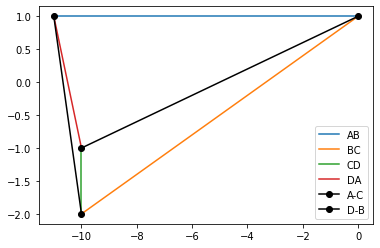

In [5]:
plt.plot((A[0], B[0]), (A[1], B[1]), label = 'AB')
plt.plot((B[0], C[0]), (B[1], C[1]), label = 'BC')
plt.plot((C[0], D[0]), (C[1], D[1]), label = 'CD')
plt.plot((D[0], A[0]), (D[1], A[1]), label = 'DA')
plt.plot((A[0], C[0]), (A[1], C[1]), marker = 'o', label = 'A-C', color="black")
plt.plot((D[0], B[0]), (D[1], B[1]), marker = 'o', label = 'D-B', color="black")
plt.legend()
plt.show()

In [6]:
if AB == 0 or BC == 0 or CD == 0 or DA == 0:
    #   НЕ чотирикутник
    print('No')
    print('No')
    print('No')
else:
    print('Yes')
    if lenght == 1:
    #   опуклий чотирикутник
        print('Yes')
    else:
        print('No')
    if lenght == 0:
    #   неопуклий чотирикутник
        print('Yes')
    else:
        print('No')

Yes
No
Yes
